### Name: Simhadri Tanya
### Reg No: BL.EN.U4AIE21119

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, TimeDistributed

In [21]:
# Load the audio signal
filename = "C:\\Users\\Tanya Simhadri\\Downloads\\AI_in_Speech_Processing_recording.mpeg"
y, sr = librosa.load(filename)

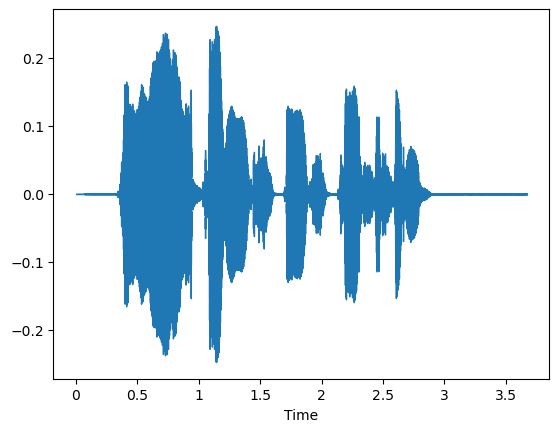

In [3]:
# Display the audio signal
librosa.display.waveshow(y)

In [22]:
import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Dropout

# Preprocessing
# Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y))

# Mel-Frequency Cepstral Coefficients (MFCC)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Linear Predictive Coding (LPC)
# You may need to use a different library for LPC extraction, as librosa doesn't provide direct support
# Alternatively, you can skip LPC for now if it's not crucial for your speech recognition task

# Prepare input data for the LSTM model
X = mfccs.T  # Transpose the MFCC matrix to match the shape expected by the LSTM model
X = X.reshape(X.shape[0], X.shape[1], 1)  # Add channel dimension

# Define LSTM model
num_classes = 10  # Replace with the actual number of classes in your dataset
model = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X.shape[1], 1)),
    TimeDistributed(Dense(units=64, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    TimeDistributed(Dense(units=num_classes, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Now you can proceed with training the model, evaluating its performance, and using it for speech recognition tasks

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 13, 256)           133120    
 onal)                                                           
                                                                 
 time_distributed (TimeDist  (None, 13, 64)            16448     
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 13, 128)           66048     
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 13, 10)            1290      
 stributed)                                           

### A2. Speak the sentence “Bhanumathi weds Rajat”(भानुमति वेड्स रजत ||భానుమతి వెడ్స రజత్). Construct speech for the word “Bharat”(భారత్|| भारत|| ಭರತ್|| பாரத்)by combining segmented phonemestaken from “Bhanumathi weds Rajat”speech recording. Listen to this word speech generated and note down the issues associated with this approach of speech synthesis.The string written Indian scripts may have some error. Please validate before using.

In [17]:
import os
import tempfile
import speech_recognition as sr
import pyttsx3

# Get a temporary directory where you have write permissions
custom_temp_dir = r"C:\Users\Tanya Simhadri\Downloads\Cust_temp_dir"

# Transcribe the audio file
audio_file = r"C:\Users\Tanya Simhadri\Downloads\Bhanumathi_weds_Rajat.wav"
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

# Define a function to segment phonemes
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    for word in words:
        if word.lower() == target_word.lower():
            return word

# Segment phonemes for the word "Bharat"
phonemes = segment_phonemes(transcription, "Bharat")

# Synthesize speech for the word "Bharat"
engine = pyttsx3.init()
output_file = os.path.join(custom_temp_dir, "bharat_speech.wav")
engine.save_to_file(phonemes, output_file)
engine.runAndWait()

In [19]:
import IPython.display as ipd 
ipd.display(ipd.Audio(r"C:\Users\Tanya Simhadri\Downloads\Cust_temp_dir\bharat_speech.wav"))